In [8]:
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import numpy as np

In [14]:
class Linear1D_LinearGrid():
    def __init__(self, values, binning):
        """
        values  : tensor-like with shape (N,), as the reference values
        binning : [lower, upper, n_points]
        """
        self.ref_values = tf.convert_to_tensor(values, dtype=tf.float32)
        self.lower, self.upper, self.n_points = binning
    
    def __call__(self, *args, **kwargs):
        return self.interp(*args, **kwargs)
    
    def interp(self, points):
        """
        points : tensor-like with shape (N, ), as the points to be interpolated.
        
        return : interpolated values at the points with shape (N,), weighted by the inverse of distance to 2^D nearest neighbors. 
        """
        points = tf.convert_to_tensor(points, dtype=tf.float32)
        return tfp.math.interp_regular_1d_grid(points, self.lower, self.upper, self.ref_values, fill_value='constant_extension')

In [17]:
x = np.linspace(0, 5, 30)
y = np.cos(x)

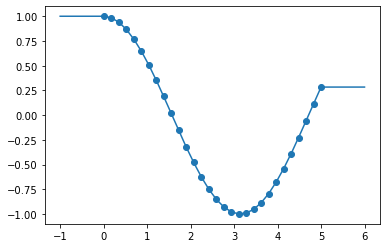

In [19]:
itpf = Linear1D_LinearGrid(y, [0, 5, 30])

xx = np.linspace(-1, 6, 330)
yy = itpf(xx)

plt.scatter(x, y)
plt.plot(xx, yy)
# plt.xlim(4, 6)
plt.show()